In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [12]:
# Load dataset dari file CSV
df = pd.read_csv('iris.csv')

# Melihat beberapa baris pertama data
df.head()

# Pisahkan fitur dan label
X = df.drop('species', axis=1).values
y = df['species'].values

# Encode label (string to integer)
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encoding label
y = to_categorical(y)

# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
model = Sequential()

# Layer input
model.add(Dense(8, input_dim=4, activation='relu'))

# Hidden layer
model.add(Dense(8, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))


C:\Users\egina\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, verbose=2)


Epoch 1/100
12/12 - 1s - 81ms/step - accuracy: 0.5667 - loss: 0.9921 - val_accuracy: 0.7333 - val_loss: 0.9733
Epoch 2/100
12/12 - 0s - 6ms/step - accuracy: 0.6083 - loss: 0.9611 - val_accuracy: 0.6667 - val_loss: 0.9393
Epoch 3/100
12/12 - 0s - 5ms/step - accuracy: 0.6583 - loss: 0.9263 - val_accuracy: 0.7333 - val_loss: 0.9008
Epoch 4/100
12/12 - 0s - 5ms/step - accuracy: 0.6667 - loss: 0.8881 - val_accuracy: 0.7667 - val_loss: 0.8605
Epoch 5/100
12/12 - 0s - 5ms/step - accuracy: 0.7000 - loss: 0.8510 - val_accuracy: 0.7667 - val_loss: 0.8174
Epoch 6/100
12/12 - 0s - 4ms/step - accuracy: 0.7167 - loss: 0.8115 - val_accuracy: 0.8333 - val_loss: 0.7769
Epoch 7/100
12/12 - 0s - 5ms/step - accuracy: 0.7750 - loss: 0.7749 - val_accuracy: 0.8333 - val_loss: 0.7364
Epoch 8/100
12/12 - 0s - 5ms/step - accuracy: 0.7917 - loss: 0.7404 - val_accuracy: 0.8333 - val_loss: 0.6967
Epoch 9/100
12/12 - 0s - 4ms/step - accuracy: 0.8000 - loss: 0.7052 - val_accuracy: 0.8333 - val_loss: 0.6613
Epoch 10/

Epoch 75/100
12/12 - 0s - 4ms/step - accuracy: 0.9500 - loss: 0.1155 - val_accuracy: 1.0000 - val_loss: 0.0702
Epoch 76/100
12/12 - 0s - 5ms/step - accuracy: 0.9500 - loss: 0.1138 - val_accuracy: 1.0000 - val_loss: 0.0702
Epoch 77/100
12/12 - 0s - 5ms/step - accuracy: 0.9500 - loss: 0.1111 - val_accuracy: 1.0000 - val_loss: 0.0673
Epoch 78/100
12/12 - 0s - 5ms/step - accuracy: 0.9500 - loss: 0.1092 - val_accuracy: 1.0000 - val_loss: 0.0659
Epoch 79/100
12/12 - 0s - 5ms/step - accuracy: 0.9500 - loss: 0.1069 - val_accuracy: 1.0000 - val_loss: 0.0657
Epoch 80/100
12/12 - 0s - 4ms/step - accuracy: 0.9500 - loss: 0.1051 - val_accuracy: 1.0000 - val_loss: 0.0645
Epoch 81/100
12/12 - 0s - 4ms/step - accuracy: 0.9583 - loss: 0.1034 - val_accuracy: 1.0000 - val_loss: 0.0655
Epoch 82/100
12/12 - 0s - 5ms/step - accuracy: 0.9583 - loss: 0.1014 - val_accuracy: 1.0000 - val_loss: 0.0646
Epoch 83/100
12/12 - 0s - 4ms/step - accuracy: 0.9583 - loss: 0.0999 - val_accuracy: 1.0000 - val_loss: 0.0639
E

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.05729633569717407
Test accuracy: 1.0


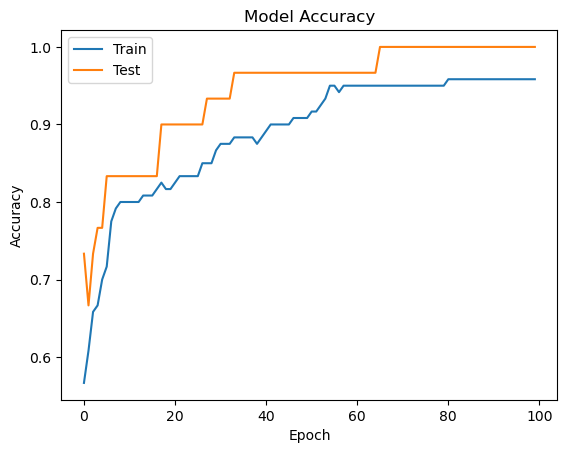

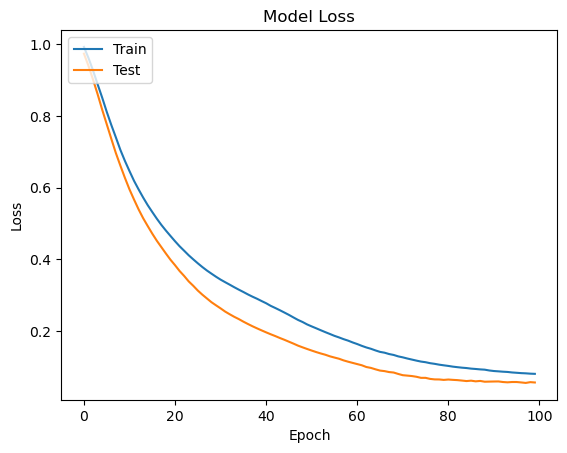

In [17]:
# Plot akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



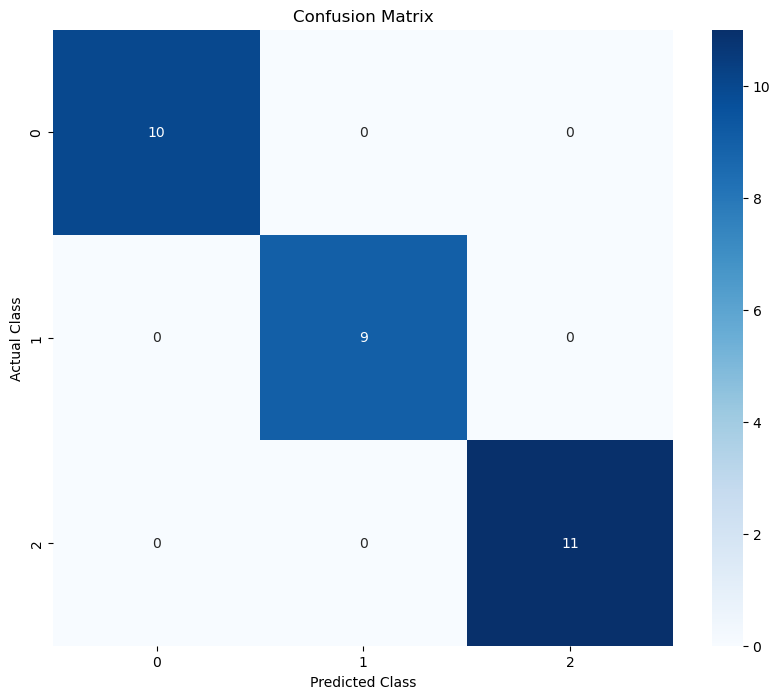

In [8]:
# Prediksi pada data test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Laporan Klasifikasi
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

# Matriks Kebingungan
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64